# PyCaret 2 Regression Example
- https://github.com/pycaret/pycaret/blob/master/examples/PyCaret%202%20Regression.ipynb

In [1]:
# check version
from pycaret.utils import version

version()

'2.2.2'

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))# デフォルトは75%

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from tqdm import tqdm_notebook as tqdm
import pycaret

sns.set()

# 常に全ての列（カラム）を表示
pd.set_option("display.max_columns", None)

!pwd
sys.executable

C:\Users\81908\jupyter_notebook\poetry_work\tfgpu\atmaCup_#8\notebook\pycaret2


'c:\\users\\81908\\appdata\\local\\pypoetry\\cache\\virtualenvs\\tfgpu-ehdmne1y-py3.8\\scripts\\python.exe'

In [3]:
# 入力ディレクトリ
data_dir = r"C:\Users\81908\jupyter_notebook\poetry_work\tfgpu\atmaCup_#8\data\atmacup08-dataset"

# 出力ディレクトリ
output_dir = "20201204"
os.makedirs(output_dir, exist_ok=True)

input_csv = f"{data_dir}/eng2.csv"

# 目的変数
target = "Global_Sales"

# 乱数シード
session_id = 123

# cv hold
fold = 5

# metric
optimize = "Accuracy"

# models
choice_ms = ["gbc", "lightgbm", "catboost", ]
#choice_ms = ['nb', 'lightgbm', "rf"]  # test用

# チューニング回数
n_iter = 100
#n_iter = 3  # test用

# compare_models()時間かかるので
#is_compare_models = False
is_compare_models = True

# setup()のcsv保存するか（0.5GBぐらい容量食うから）
is_save_setup_csv = False
#is_save_setup_csv = True

# 学習に除く列
ignore_features = []

In [4]:
import pandas as pd

#DATADIR = r"C:\Users\81908\jupyter_notebook\poetry_work\tfgpu\atmaCup_#8\data\atmacup08-dataset"
#train = pd.read_csv(f"{DATADIR}/train.csv")
#test = pd.read_csv(f"{DATADIR}/test.csv")

DATADIR = r"C:\Users\81908\jupyter_notebook\poetry_work\tfgpu\atmaCup_#8\notebook\data_check"
train = pd.read_csv(f"{DATADIR}/train_preprocess.csv")
test = pd.read_csv(f"{DATADIR}/test_preprocess.csv")

train = train.loc[:, test.columns.to_list() + ["Global_Sales"]]
train

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,User_Score_was_missing,Critic_Score_was_missing,Critic_Count_was_missing,User_Count_was_missing,Global_Sales
0,0,0,0,0,0,74.000000,17.000000,7.9,22.000000,0,0,0,0,0,0,306.0
1,1,0,0,0,1,78.000000,22.000000,6.6,28.000000,0,0,0,0,0,0,234.0
2,0,1,0,0,0,73.000000,5.000000,7.4,10.000000,0,0,0,0,0,0,128.0
3,2,2,0,0,2,68.967679,26.360821,7.8,162.229908,1,1,1,1,1,1,125.0
4,3,0,0,0,0,76.000000,8.000000,7.8,13.000000,0,0,0,0,0,0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,6227,8,37,11,201,78.000000,57.000000,8.0,569.000000,775,1,0,0,0,0,4.0
8355,6228,8,37,11,202,68.967679,26.360821,7.8,162.229908,1,1,1,1,1,1,1.0
8356,6229,13,38,0,17,68.967679,26.360821,7.8,162.229908,1,1,1,1,1,1,1.0
8357,6230,29,38,7,3,68.967679,26.360821,7.8,162.229908,1,1,1,1,1,1,4.0


In [5]:
params = dict(target="Global_Sales", 
              session_id=123, 
              silent=True,
             )

In [6]:
from pycaret.regression import *

reg1 = setup(train, **params)

,Description,Value
0,session_id,123
1,Target,Global_Sales
2,Original Data,"(8359, 16)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(5851, 29)"


In [7]:
best_model = compare_models(fold=5, sort="RMSE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,52.5888,22849.6917,149.5624,0.2451,1.2351,3.2323,0.0200
gbr,Gradient Boosting Regressor,52.4907,23803.0919,152.2532,0.2273,1.2699,3.5549,0.1020
catboost,CatBoost Regressor,50.5526,23839.4797,153.3696,0.1954,1.2043,3.1694,1.8560
rf,Random Forest Regressor,51.9411,24985.9283,156.9651,0.1550,1.1713,3.1703,0.3060
et,Extra Trees Regressor,50.5976,25078.2542,157.3280,0.1544,1.1659,3.2808,0.2180
xgboost,Extreme Gradient Boosting,51.7122,25946.8977,160.1667,0.1079,1.2040,3.2776,0.2760
br,Bayesian Ridge,65.7632,27498.3530,163.1522,0.1190,1.5791,5.8787,0.0060
ridge,Ridge Regression,66.3649,27516.5701,163.2463,0.1175,1.5849,5.9832,0.0040
lr,Linear Regression,66.3871,27516.2947,163.2467,0.1175,1.5848,5.9869,0.3080
lasso,Lasso Regression,65.7808,27545.6904,163.2608,0.1181,1.5800,5.8766,0.2520


In [ ]:
lightgbm = create_model('lightgbm')

In [ ]:
tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize = 'MAE')

In [ ]:
tuned_lightgbm

In [ ]:
dt = create_model('dt')

In [ ]:
bagged_dt = ensemble_model(dt, n_estimators=50)

In [ ]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

In [ ]:
blender = blend_models()

In [ ]:
stacker = stack_models(
    estimator_list=compare_models(
        n_select=5, fold=5, whitelist=models(type="ensemble").index.tolist()
    )
)

# data load

In [5]:
def preprocess(train_df, test_df, target_col):
    """前処理"""
    df = train_df.append(test_df).reset_index(drop=True)
    
    # label encoding. これしないとoehot encodingでメモリ死ぬ
    for col in df.select_dtypes(include=["object", "category", "bool"]).columns.to_list():
        df[col], uni = pd.factorize(df[col])
    
    train_df = df[df[target_col].notnull()].reset_index(drop=True)
    train_df[target_col] = train_df[target_col].astype(int)
    test_df = df[df[target_col].isnull()].reset_index(drop=True)
    
    return train_df, test_df

In [6]:
df = pd.read_csv(input_csv, index_col=0)
df_train = df[df[target].notnull()].reset_index(drop=True)
df_test = df[df[target].isnull()].reset_index(drop=True)

df_train, df_test = preprocess(df_train, df_test, target)

print(df_train.info())
display(
    df_train.head().style.background_gradient(cmap="Pastel1")
)  
display(df_train.describe().style.background_gradient(cmap="Pastel1"))

print(df_test.info())
display(df_test.head().style.background_gradient(cmap="Pastel1"))
display(df_test.describe().style.background_gradient(cmap="Pastel1"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66105 entries, 0 to 66104
Columns: 445 entries, A1-level to B4-category2_B4-weapon_freq1ratio
dtypes: float64(339), int32(1), int64(105)
memory usage: 224.2 MB
None


,A1-level,A1-rank,A1-weapon,A2-level,A2-rank,A2-weapon,A3-level,A3-rank,A3-weapon,A4-level,A4-rank,A4-weapon,B1-level,B1-rank,B1-weapon,B2-level,B2-rank,B2-weapon,B3-level,B3-rank,B3-weapon,B4-level,B4-rank,B4-weapon,lobby-mode,mode,stage,y,year,month,day,dayofyear,dayofweek,weekend,hour,A1-category1,A1-category2,A1-mainweapon,A1-subweapon,A1-special,A1-splatnet,A2-category1,A2-category2,A2-mainweapon,A2-subweapon,A2-special,A2-splatnet,A3-category1,A3-category2,A3-mainweapon,A3-subweapon,A3-special,A3-splatnet,A4-category1,A4-category2,A4-mainweapon,A4-subweapon,A4-special,A4-splatnet,B1-category1,B1-category2,B1-mainweapon,B1-subweapon,B1-special,B1-splatnet,B2-category1,B2-category2,B2-mainweapon,B2-subweapon,B2-special,B2-splatnet,B3-category1,B3-category2,B3-mainweapon,B3-subweapon,B3-special,B3-splatnet,B4-category1,B4-category2,B4-mainweapon,B4-subweapon,B4-special,B4-splatnet,A_n_player,B_n_player,A1-weapon_win_rate,A2-weapon_win_rate,A3-weapon_win_rate,A4-weapon_win_rate,B1-weapon_win_rate,B2-weapon_win_rate,B3-weapon_win_rate,B4-weapon_win_rate,A1-rank_win_rate,A2-rank_win_rate,A3-rank_win_rate,A4-rank_win_rate,B1-rank_win_rate,B2-rank_win_rate,B3-rank_win_rate,B4-rank_win_rate,A1-mainweapon_win_rate,A2-mainweapon_win_rate,A3-mainweapon_win_rate,A4-mainweapon_win_rate,B1-mainweapon_win_rate,B2-mainweapon_win_rate,B3-mainweapon_win_rate,B4-mainweapon_win_rate,A1-category1_win_rate,A2-category1_win_rate,A3-category1_win_rate,A4-category1_win_rate,B1-category1_win_rate,B2-category1_win_rate,B3-category1_win_rate,B4-category1_win_rate,A1-category2_win_rate,A2-category2_win_rate,A3-category2_win_rate,A4-category2_win_rate,B1-category2_win_rate,B2-category2_win_rate,B3-category2_win_rate,B4-category2_win_rate,A1-special_win_rate,A2-special_win_rate,A3-special_win_rate,A4-special_win_rate,B1-special_win_rate,B2-special_win_rate,B3-special_win_rate,B4-special_win_rate,A1-rank_A2-rank_A3-rank_A4-rank_sum,A1-rank_A2-rank_A3-rank_A4-rank_mean,A1-rank_A2-rank_A3-rank_A4-rank_std,A1-rank_A2-rank_A3-rank_A4-rank_ratio_range,A1-rank_A2-rank_A3-rank_A4-rank_mean_var,A1-rank_A2-rank_A3-rank_A4-rank_ptp,B1-rank_B2-rank_B3-rank_B4-rank_sum,B1-rank_B2-rank_B3-rank_B4-rank_mean,B1-rank_B2-rank_B3-rank_B4-rank_std,B1-rank_B2-rank_B3-rank_B4-rank_ratio_range,B1-rank_B2-rank_B3-rank_B4-rank_mean_var,B1-rank_B2-rank_B3-rank_B4-rank_ptp,diff_AB-rank_sum,diff_AB-rank_mean,diff_AB-rank_std,diff_AB-rank_ratio_range,diff_AB-rank_mean_var,diff_AB-rank_ptp,A1-level_A2-level_A3-level_A4-level_sum,A1-level_A2-level_A3-level_A4-level_mean,A1-level_A2-level_A3-level_A4-level_std,A1-level_A2-level_A3-level_A4-level_ratio_range,A1-level_A2-level_A3-level_A4-level_mean_var,A1-level_A2-level_A3-level_A4-level_ptp,B1-level_B2-level_B3-level_B4-level_sum,B1-level_B2-level_B3-level_B4-level_mean,B1-level_B2-level_B3-level_B4-level_std,B1-level_B2-level_B3-level_B4-level_ratio_range,B1-level_B2-level_B3-level_B4-level_mean_var,B1-level_B2-level_B3-level_B4-level_ptp,diff_AB-level_sum,diff_AB-level_mean,diff_AB-level_std,diff_AB-level_ratio_range,diff_AB-level_mean_var,diff_AB-level_ptp,A1-weapon_win_rate_A2-weapon_win_rate_A3-weapon_win_rate_A4-weapon_win_rate_sum,A1-weapon_win_rate_A2-weapon_win_rate_A3-weapon_win_rate_A4-weapon_win_rate_mean,A1-weapon_win_rate_A2-weapon_win_rate_A3-weapon_win_rate_A4-weapon_win_rate_std,A1-weapon_win_rate_A2-weapon_win_rate_A3-weapon_win_rate_A4-weapon_win_rate_ratio_range,A1-weapon_win_rate_A2-weapon_win_rate_A3-weapon_win_rate_A4-weapon_win_rate_mean_var,A1-weapon_win_rate_A2-weapon_win_rate_A3-weapon_win_rate_A4-weapon_win_rate_ptp,B1-weapon_win_rate_B2-weapon_win_rate_B3-weapon_win_rate_B4-weapon_win_rate_sum,B1-weapon_win_rate_B2-weapon_win_rate_B3-weapon_win_rate_B4-weapon_win_rate_mean,B1-weapon_win_rate_B2-weapon_win_rate_B3-weapon_win_rate_B4-weapon_win_rate_std,B1-weapon_win_rate_B2-weapon_win_rate_B3-weapon_win_rate_B4-weapon_win_rate_ratio_range,B1-weapon_win_rate_B2-weapon_win_rate_B3-weapon_win_rate_B4-weapon_w

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28340 entries, 0 to 28339
Columns: 445 entries, A1-level to B4-category2_B4-weapon_freq1ratio
dtypes: float64(340), int64(105)
memory usage: 96.2 MB
None


c:\users\81908\appdata\local\pypoetry\cache\virtualenvs\pycaret2-xxk2w9e6-py3.8\lib\site-packages\pandas\io\formats\style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
c:\users\81908\appdata\local\pypoetry\cache\virtualenvs\pycaret2-xxk2w9e6-py3.8\lib\site-packages\pandas\io\formats\style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,A1-level,A1-rank,A1-weapon,A2-level,A2-rank,A2-weapon,A3-level,A3-rank,A3-weapon,A4-level,A4-rank,A4-weapon,B1-level,B1-rank,B1-weapon,B2-level,B2-rank,B2-weapon,B3-level,B3-rank,B3-weapon,B4-level,B4-rank,B4-weapon,lobby-mode,mode,stage,y,year,month,day,dayofyear,dayofweek,weekend,hour,A1-category1,A1-category2,A1-mainweapon,A1-subweapon,A1-special,A1-splatnet,A2-category1,A2-category2,A2-mainweapon,A2-subweapon,A2-special,A2-splatnet,A3-category1,A3-category2,A3-mainweapon,A3-subweapon,A3-special,A3-splatnet,A4-category1,A4-category2,A4-mainweapon,A4-subweapon,A4-special,A4-splatnet,B1-category1,B1-category2,B1-mainweapon,B1-subweapon,B1-special,B1-splatnet,B2-category1,B2-category2,B2-mainweapon,B2-subweapon,B2-special,B2-splatnet,B3-category1,B3-category2,B3-mainweapon,B3-subweapon,B3-special,B3-splatnet,B4-category1,B4-category2,B4-mainweapon,B4-subweapon,B4-special,B4-splatnet,A_n_player,B_n_player,A1-weapon_win_rate,A2-weapon_win_rate,A3-weapon_win_rate,A4-weapon_win_rate,B1-weapon_win_rate,B2-weapon_win_rate,B3-weapon_win_rate,B4-weapon_win_rate,A1-rank_win_rate,A2-rank_win_rate,A3-rank_win_rate,A4-rank_win_rate,B1-rank_win_rate,B2-rank_win_rate,B3-rank_win_rate,B4-rank_win_rate,A1-mainweapon_win_rate,A2-mainweapon_win_rate,A3-mainweapon_win_rate,A4-mainweapon_win_rate,B1-mainweapon_win_rate,B2-mainweapon_win_rate,B3-mainweapon_win_rate,B4-mainweapon_win_rate,A1-category1_win_rate,A2-category1_win_rate,A3-category1_win_rate,A4-category1_win_rate,B1-category1_win_rate,B2-category1_win_rate,B3-category1_win_rate,B4-category1_win_rate,A1-category2_win_rate,A2-category2_win_rate,A3-category2_win_rate,A4-category2_win_rate,B1-category2_win_rate,B2-category2_win_rate,B3-category2_win_rate,B4-category2_win_rate,A1-special_win_rate,A2-special_win_rate,A3-special_win_rate,A4-special_win_rate,B1-special_win_rate,B2-special_win_rate,B3-special_win_rate,B4-special_win_rate,A1-rank_A2-rank_A3-rank_A4-rank_sum,A1-rank_A2-rank_A3-rank_A4-rank_mean,A1-rank_A2-rank_A3-rank_A4-rank_std,A1-rank_A2-rank_A3-rank_A4-rank_ratio_range,A1-rank_A2-rank_A3-rank_A4-rank_mean_var,A1-rank_A2-rank_A3-rank_A4-rank_ptp,B1-rank_B2-rank_B3-rank_B4-rank_sum,B1-rank_B2-rank_B3-rank_B4-rank_mean,B1-rank_B2-rank_B3-rank_B4-rank_std,B1-rank_B2-rank_B3-rank_B4-rank_ratio_range,B1-rank_B2-rank_B3-rank_B4-rank_mean_var,B1-rank_B2-rank_B3-rank_B4-rank_ptp,diff_AB-rank_sum,diff_AB-rank_mean,diff_AB-rank_std,diff_AB-rank_ratio_range,diff_AB-rank_mean_var,diff_AB-rank_ptp,A1-level_A2-level_A3-level_A4-level_sum,A1-level_A2-level_A3-level_A4-level_mean,A1-level_A2-level_A3-level_A4-level_std,A1-level_A2-level_A3-level_A4-level_ratio_range,A1-level_A2-level_A3-level_A4-level_mean_var,A1-level_A2-level_A3-level_A4-level_ptp,B1-level_B2-level_B3-level_B4-level_sum,B1-level_B2-level_B3-level_B4-level_mean,B1-level_B2-level_B3-level_B4-level_std,B1-level_B2-level_B3-level_B4-level_ratio_range,B1-level_B2-level_B3-level_B4-level_mean_var,B1-level_B2-level_B3-level_B4-level_ptp,diff_AB-level_sum,diff_AB-level_mean,diff_AB-level_std,diff_AB-level_ratio_range,diff_AB-level_mean_var,diff_AB-level_ptp,A1-weapon_win_rate_A2-weapon_win_rate_A3-weapon_win_rate_A4-weapon_win_rate_sum,A1-weapon_win_rate_A2-weapon_win_rate_A3-weapon_win_rate_A4-weapon_win_rate_mean,A1-weapon_win_rate_A2-weapon_win_rate_A3-weapon_win_rate_A4-weapon_win_rate_std,A1-weapon_win_rate_A2-weapon_win_rate_A3-weapon_win_rate_A4-weapon_win_rate_ratio_range,A1-weapon_win_rate_A2-weapon_win_rate_A3-weapon_win_rate_A4-weapon_win_rate_mean_var,A1-weapon_win_rate_A2-weapon_win_rate_A3-weapon_win_rate_A4-weapon_win_rate_ptp,B1-weapon_win_rate_B2-weapon_win_rate_B3-weapon_win_rate_B4-weapon_win_rate_sum,B1-weapon_win_rate_B2-weapon_win_rate_B3-weapon_win_rate_B4-weapon_win_rate_mean,B1-weapon_win_rate_B2-weapon_win_rate_B3-weapon_win_rate_B4-weapon_win_rate_std,B1-weapon_win_rate_B2-weapon_win_rate_B3-weapon_win_rate_B4-weapon_win_rate_ratio_range,B1-weapon_win_rate_B2-weapon_win_rate_B3-weapon_win_rate_B4-weapon_w

In [7]:
params = {"target": target, 
          "session_id": session_id, 
          "silent": True,
          #"ignore_features": ignore_features,
         }

# 2. Initialize Setup

In [8]:
#from pycaret.classification import *
#help(setup)

In [9]:
from pycaret.regression import *

if is_save_setup_csv:
    _df_test = df_test.copy()
    _df_test[target] = 0  # target列仮で入れる
    
    clf1 = setup(_df_test, **params)
    display(clf1[0].head(3))
    
    # 一応前処理後のtest set保存しておく
    pd.concat([clf1[0], clf1[1]], axis=1).to_csv(
        os.path.join(output_dir, "test_setup.csv"), index=False
    )  

clf1 = setup(df_train, **params)
display(clf1[0].head(3))

if is_save_setup_csv:
    # 一応前処理後のtrain set保存しておく
    pd.concat([clf1[0], clf1[1]], axis=1).to_csv(
        os.path.join(output_dir, "train_setup.csv"), index=False
    )  

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(66105, 445)"
4,Missing Values,True
5,Numeric Features,319
6,Categorical Features,125
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


,A1-level,A1-weapon,A2-level,A2-weapon,A3-level,A3-weapon,A4-level,A4-weapon,B1-level,B1-weapon,...,B4-category2_B4-weapon_freq1name_1324.0,B4-category2_B4-weapon_freq1name_1326.0,B4-category2_B4-weapon_freq1name_1496.0,B4-category2_B4-weapon_freq1name_2025.0,B4-category2_B4-weapon_freq1name_2056.0,B4-category2_B4-weapon_freq1name_3120.0,B4-category2_B4-weapon_freq1name_378.0,B4-category2_B4-weapon_freq1name_4673.0,B4-category2_B4-weapon_freq1name_4802.0,B4-category2_B4-weapon_freq1name_not_available
0,139.0,0.0,118.0,0.0,13.0,0.0,10.0,0.0,28.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,198.0,1.0,77.0,1.0,198.0,1.0,123.0,1.0,83.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,114.0,2.0,68.0,2.0,225.0,2.0,107.0,2.0,50.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
# test
lr = create_model('lr', fold=fold)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5384,0.5511,0.7411,0.5441,0.6275,0.0569,0.0618
1,0.5398,0.5554,0.7182,0.5467,0.6208,0.0622,0.0660
2,0.5436,0.5487,0.7460,0.5477,0.6317,0.0675,0.0733
3,0.5378,0.5454,0.7221,0.5449,0.6211,0.0575,0.0613
4,0.5399,0.5442,0.7281,0.5461,0.6241,0.0613,0.0656
Mean,0.5399,0.5490,0.7311,0.5459,0.6251,0.0611,0.0656
SD,0.0020,0.0040,0.0107,0.0013,0.0041,0.0038,0.0043


# 3. Compare Baseline

In [11]:
if is_compare_models:
    best_model = compare_models(sort=optimize, fold=fold)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.5595,0.5836,0.6850,0.5663,0.6200,0.1071,0.1099,519.4674
1,CatBoost Classifier,0.5562,0.5781,0.6520,0.5670,0.6065,0.1033,0.1046,35.7055
2,Light Gradient Boosting Machine,0.5541,0.5763,0.6568,0.5645,0.6071,0.0984,0.0999,17.9822
3,Ada Boost Classifier,0.5513,0.5739,0.6604,0.5615,0.6069,0.0921,0.0937,109.4872
4,Ridge Classifier,0.5486,0.0000,0.6418,0.5610,0.5987,0.0882,0.0892,14.6932
5,Linear Discriminant Analysis,0.5485,0.5687,0.6408,0.5610,0.5982,0.0880,0.0890,12.0636
6,Extreme Gradient Boosting,0.5401,0.5560,0.6016,0.5572,0.5785,0.0742,0.0745,30.0807
7,Logistic Regression,0.5399,0.5490,0.7311,0.5459,0.6251,0.0611,0.0656,4.1777
8,Extra Trees Classifier,0.5381,0.5529,0.6198,0.5534,0.5847,0.0681,0.0687,9.2395
9,Naive Bayes,0.5254,0.5457,0.4007,0.5679,0.4690,0.0627,0.0661,3.3672


# 4. Create Model

In [12]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [13]:
models(type="ensemble").index.tolist()

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm', 'catboost']

In [14]:
#ensembled_models = compare_models(
#    whitelist=models(type="ensemble").index.tolist(), fold=3
#)

# 5. Tune Hyperparameters

In [15]:
tune_models = []
for m in choice_ms:
    
    m = create_model(m, fold=fold)
    
    tuned_m = tune_model(
        m,
        fold=fold,
        optimize=optimize,
        n_iter=n_iter,
    )
    tune_models.append(tuned_m)

tuned_lightgbm = tune_models[1]
print(tune_models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5627,0.5838,0.7036,0.5671,0.6280,0.1123,0.1162
1,0.5642,0.5945,0.7046,0.5683,0.6291,0.1154,0.1193
2,0.5628,0.5817,0.6805,0.5698,0.6202,0.1146,0.1172
3,0.5671,0.5932,0.6966,0.5718,0.6280,0.1222,0.1256
4,0.5632,0.5877,0.7071,0.5672,0.6294,0.1130,0.1171
Mean,0.5640,0.5882,0.6985,0.5688,0.6270,0.1155,0.1191
SD,0.0016,0.0050,0.0096,0.0018,0.0034,0.0035,0.0034


[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=100,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=120,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.8500000000000002,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.3, max_depth=70,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=10, n_jobs=-1, num_lea

In [16]:
#help(finalize_model)

In [18]:
# cv分けず+hold-outのデータも全部含めて学習

#clf1 = imbalance_setup(fold=None)

f_tune_models = []
for m, name in zip(tune_models, choice_ms):
    f_m = finalize_model(m)
    f_tune_models.append(f_m)
    save_model(f_m, model_name=os.path.join(output_dir, "pycaret_tuned_" + name))

print(f_tune_models)

Transformation Pipeline and Model Succesfully Saved
[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=100,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=120,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.8500000000000002,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.3, max_depth=70,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.2

# 6. Ensemble Model は省略

# 7. Blend Models

In [ ]:
#help(blend_models)

In [ ]:
# CatBoost Classifierはエラーになる

#clf1 = imbalance_setup(fold=fold)
#
#blender = blend_models(estimator_list=tune_models, 
#                       fold=fold,
#                       optimize=optimize,
#                       method="soft", 
#                       choose_better=True,  # 精度改善しなかった場合、create_model()で作ったモデルを返す
#                      )
#save_model(blender, model_name=os.path.join(output_dir, "pycaret_blender"))

# 8. Stack Models

In [ ]:
#help(stack_models)

In [19]:
#clf1 = imbalance_setup(fold=fold)  # finalize=Trueでもfold指定必要

stacker = stack_models(estimator_list=tune_models[:-1], 
                       meta_model=tune_models[-1],
                       fold=fold,
                       optimize=optimize,
                       #finalize=True,  # cv分けず+hold-outのデータも全部含めて学習
                      )
save_model(stacker, model_name=os.path.join(output_dir, "pycaret_stacker"))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5615,0.5827,0.6927,0.5672,0.6237,0.1108,0.1140
1,0.5662,0.5935,0.6912,0.5715,0.6257,0.1207,0.1238
2,0.5622,0.5818,0.6690,0.5705,0.6159,0.1143,0.1163
3,0.5686,0.5945,0.6869,0.5743,0.6256,0.1263,0.1291
4,0.5636,0.5866,0.6851,0.5700,0.6223,0.1159,0.1187
Mean,0.5644,0.5878,0.6850,0.5707,0.6226,0.1176,0.1204
SD,0.0026,0.0053,0.0085,0.0023,0.0036,0.0054,0.0054


Transformation Pipeline and Model Succesfully Saved


# 9. Analyze Model

In [20]:
#from pycaret.classification import *
#help(plot_model)

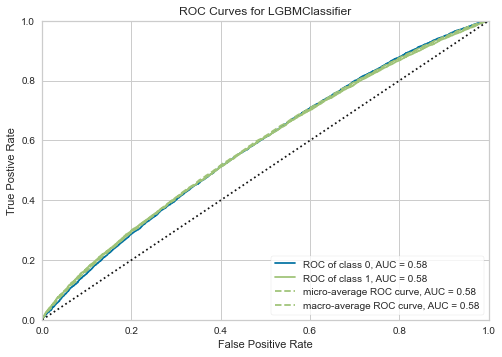

In [21]:
plot_model(tune_models[1])

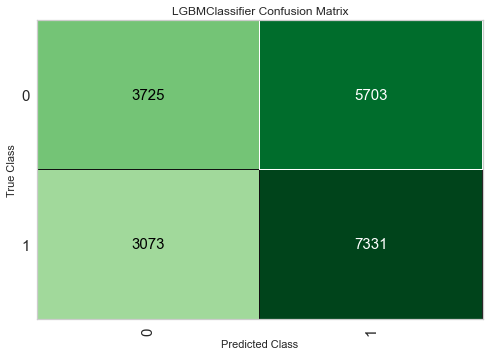

In [22]:
plot_model(tune_models[1], plot="confusion_matrix")

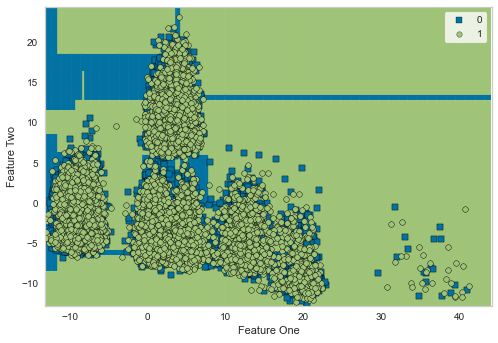

In [23]:
plot_model(tune_models[1], plot="boundary")

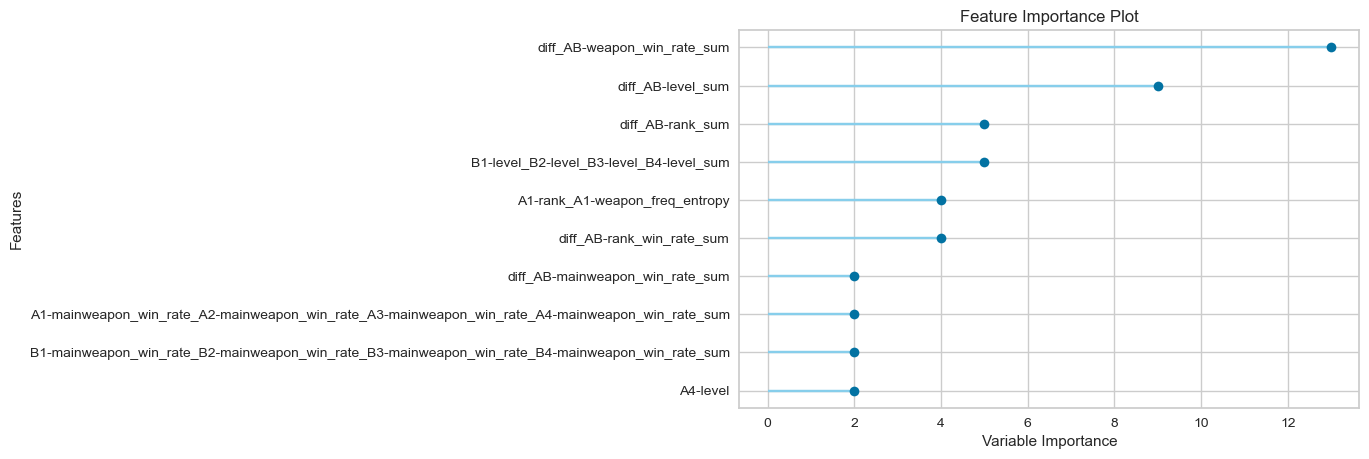

In [24]:
plot_model(tune_models[1], plot="feature")  # catboostはエラーになる

In [25]:
# prだけ異様に時間かかるのでコメントアウト
#plot_model(tune_models[1], plot="pr")

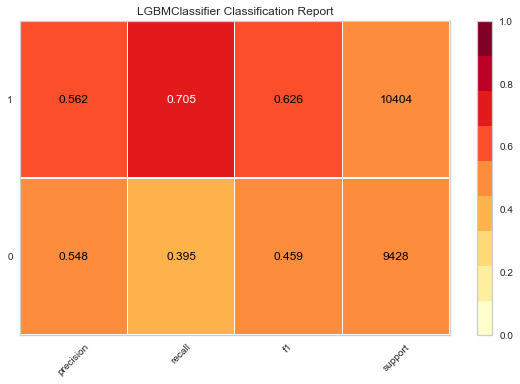

In [26]:
plot_model(tune_models[1], plot="class_report")

In [27]:
evaluate_model(tune_models[1])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 10. Interpret Model

In [ ]:
#catboost = create_model("catboost", cross_validation=False)

## DockerではShapはつかえない。Docker imageが壊れるらしいのでインストールしていない

In [ ]:
#interpret_model(catboost)

In [ ]:
#interpret_model(catboost, plot="correlation")

In [ ]:
#interpret_model(catboost, plot="reason", observation=12)

# 11. AutoML()

In [ ]:
# help(automl)

In [ ]:
#%%time
## なんかエラーになる。。。
#automl = automl(optimize=optimize)
#save_model(automl, model_name=os.path.join(output_dir, "pycaret_automl"))
#print(automl)

# 12. Predict Model

In [ ]:
#pred_holdouts = predict_model(f_tune_models[0])
#pred_holdouts.head()

In [ ]:
#new_data = df_test.copy()
#predict_new = predict_model(f_tune_models[0], data=new_data)
#predict_new.head()

In [28]:
f_tune_models = []
for name in choice_ms:
    loaded_model = load_model(os.path.join(output_dir, f"pycaret_tuned_{name}"))
    f_tune_models.append(loaded_model)
stacker = load_model(os.path.join(output_dir, f"pycaret_stacker"))

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [29]:
def make_submit(df_test, model, data_dir: str, output_dir: str, csv_name: str):
    """submit csv作成"""
    df_sub = predict_model(model, data=df_test)[["Label"]].reset_index()
    df_sub.columns = ["id", "y"]
    df_sub.to_csv(f"{output_dir}/{csv_name}.csv", index=False)
    display(df_sub.head())
    
    
for m, name in zip(f_tune_models, choice_ms):
    make_submit(df_test, m, data_dir, output_dir, f"{name}_submission")
#make_submit(df_test, blender, data_dir, output_dir, "blender_submission")
make_submit(df_test, stacker, data_dir, output_dir, "stacker_submission")
#make_submit(df_test, automl, data_dir, output_dir, "automl_submission")

,id,y
0,0,0
1,1,0
2,2,0
3,3,1
4,4,1


,id,y
0,0,0
1,1,0
2,2,1
3,3,1
4,4,1


,id,y
0,0,0
1,1,0
2,2,1
3,3,1
4,4,1


,id,y
0,0,0
1,1,0
2,2,1
3,3,1
4,4,1


# 13. Save / Load Model

In [ ]:
#save_model(best, model_name=os.path.join(output_dir, "pycaret_automl"))

In [ ]:
#loaded_bestmodel = load_model(os.path.join(output_dir, "pycaret_automl"))
#print(loaded_bestmodel)

In [30]:
from sklearn import set_config

set_config(display="diagram")
loaded_bestmodel[0]

NameError: name 'loaded_bestmodel' is not defined

In [31]:
from sklearn import set_config

set_config(display="text")

# 14. Deploy Model

In [32]:
#deploy_model(best, model_name="best-aws", authentication={"bucket": "pycaret-test"})

# 15. Get Config / Set Config

In [33]:
X_train = get_config("X_train")
X_train.head()

,A1-level,A1-weapon,A2-level,A2-weapon,A3-level,A3-weapon,A4-level,A4-weapon,B1-level,B1-weapon,...,B4-category2_B4-weapon_freq1name_1324.0,B4-category2_B4-weapon_freq1name_1326.0,B4-category2_B4-weapon_freq1name_1496.0,B4-category2_B4-weapon_freq1name_2025.0,B4-category2_B4-weapon_freq1name_2056.0,B4-category2_B4-weapon_freq1name_3120.0,B4-category2_B4-weapon_freq1name_378.0,B4-category2_B4-weapon_freq1name_4673.0,B4-category2_B4-weapon_freq1name_4802.0,B4-category2_B4-weapon_freq1name_not_available
37536,347.0,121.0,96.0,36.0,138.0,26.0,76.0,138.0,256.0,26.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23193,118.0,127.0,62.0,1.0,82.0,8.0,82.0,31.0,209.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
56861,352.0,14.0,561.0,9.0,477.0,32.0,112.0,37.0,423.0,26.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26354,237.0,5.0,227.0,72.0,52.0,24.0,39.0,9.0,182.0,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
38343,95.0,6.0,240.0,47.0,126.0,137.0,169.0,4.0,38.0,16.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [34]:
get_config("seed")

123

In [35]:
from pycaret.classification import set_config

set_config("seed", 999)

In [36]:
get_config("seed")

999

# 16. MLFlow UI

In [ ]:
# !mlflow ui

# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org